In [1]:
import cv2
import re
from matplotlib import pyplot as plt
import numpy as np
import pytesseract
import pymongo
from PIL import Image
im_file = "C:/Users/neeta/temp/ptest.jpg"
img = cv2.imread(im_file)

In [2]:
print(img.shape)

(339, 500, 3)


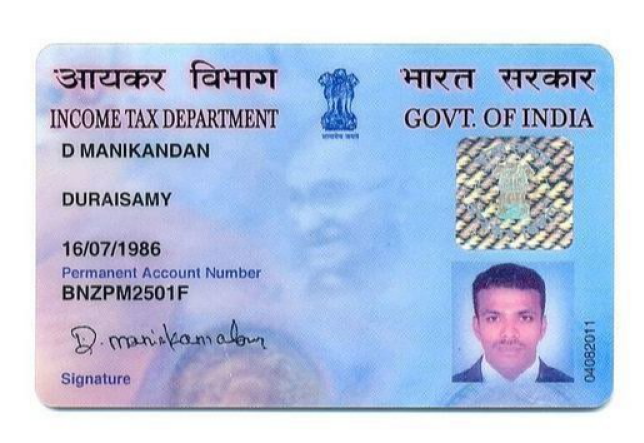

In [3]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()
display(im_file)

In [4]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
gray_image = grayscale(img)
cv2.imwrite("C:/Users/neeta/temp/gray2.jpg", gray_image)

True

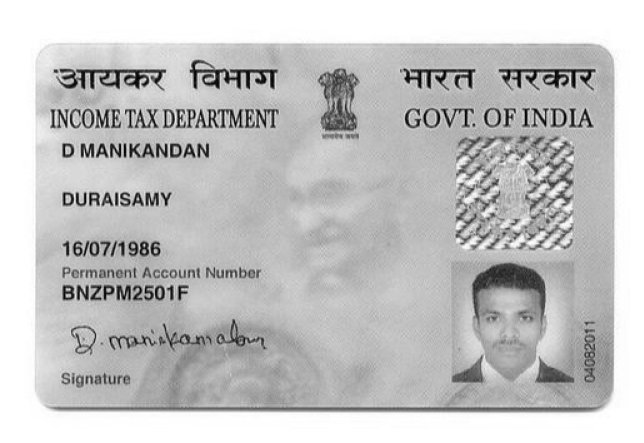

In [6]:
display("C:/Users/neeta/temp/gray2.jpg")

In [9]:
cropped_image = gray_image[95:239, :230]
cv2.imwrite("C:/Users/neeta/temp/CropPan.jpg", cropped_image)

True

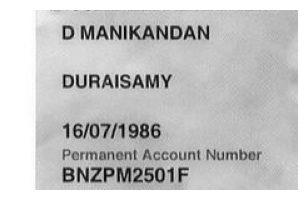

In [10]:
display("C:/Users/neeta/temp/CropPan.jpg")

In [11]:
thresh, im_bw = cv2.threshold(gray_image, 140, 190, cv2.THRESH_BINARY)
cv2.imwrite("C:/Users/neeta/temp/bw2.jpg", im_bw)

True

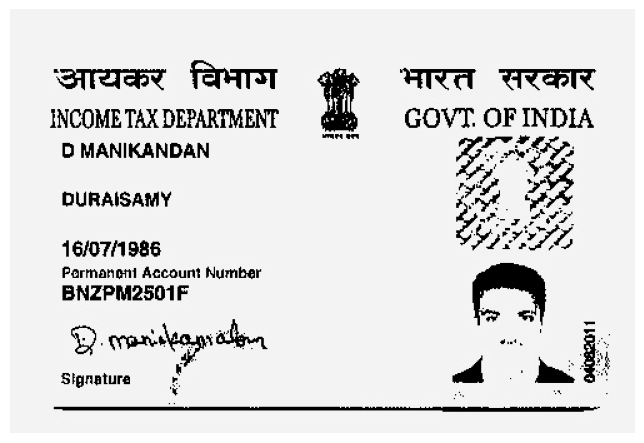

In [12]:
display("C:/Users/neeta/temp/bw2.jpg")

In [13]:
im_file = "C:/Users/neeta/temp/cropPan.jpg"

In [14]:
img = Image.open(im_file)
ocr_result1 = pytesseract.image_to_string(img)

In [15]:
print(ocr_result1)

D MANIKANDAN
DURAISAMY

16/07/1986
Pormanent Account Number

BNZPM2501F



In [16]:
pattern = re.compile('.*\s')
matches = pattern.finditer(ocr_result1)

In [17]:
for match in matches:
    print(match)

<re.Match object; span=(0, 13), match='D MANIKANDAN\n'>
<re.Match object; span=(13, 23), match='DURAISAMY\n'>
<re.Match object; span=(23, 24), match='\n'>
<re.Match object; span=(24, 35), match='16/07/1986\n'>
<re.Match object; span=(35, 60), match='Pormanent Account Number\n'>
<re.Match object; span=(60, 61), match='\n'>
<re.Match object; span=(61, 72), match='BNZPM2501F\n'>
<re.Match object; span=(72, 73), match='\x0c'>


In [82]:
f1 = ocr_result1[0:12]
f2 = ocr_result1[13:22]
f3 = ocr_result1[24:34]
f4 = ocr_result1[61:71]

In [19]:
print(ocr_result1[0:12])
print(ocr_result1[13:22])
print(ocr_result1[24:34])
print(ocr_result1[61:71])

D MANIKANDAN
DURAISAMY
16/07/1986
BNZPM2501F


In [20]:
if __name__ == "__main__":
    client = pymongo.MongoClient("mongodb://localhost:27017")
    print(client)
    print(client.list_database_names())

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)
['OCR', 'admin', 'config', 'local', 'sample']


In [21]:
    db = client['OCR']  
    collection = db['PAN']

In [22]:
    dic1 = {'Name': f1, "Father's Name" : f2,'D.O.B.' : f3, 'PAN Number' : f4}
    collection.insert_one(dic1)

InsertOneResult(ObjectId('66477b004e33d50be2db5c8a'), acknowledged=True)

In [23]:
im_file = "C:/Users/neeta/temp/pan2.jpg"
imge = cv2.imread(im_file)

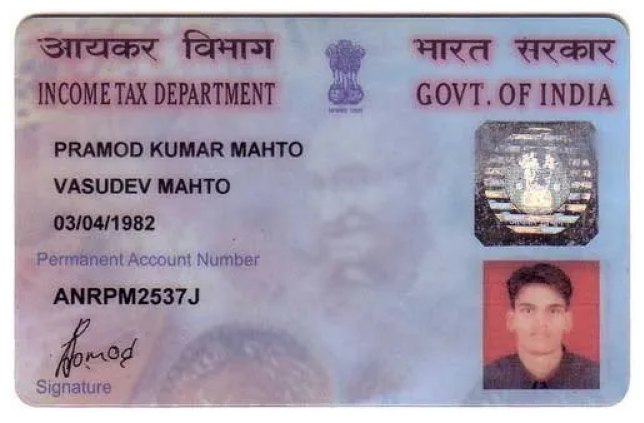

In [24]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width = im_data.shape[:2]
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()
display(im_file)

In [25]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [53]:
grayime = grayscale(imge)
cv2.imwrite("C:/Users/neeta/temp/gray3.jpg", grayime)

True

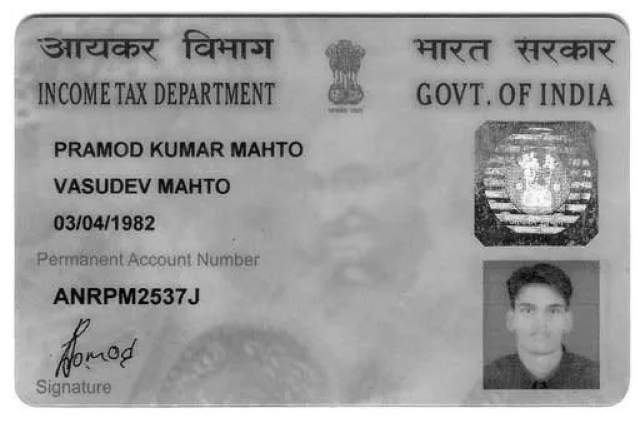

In [54]:
display("C:/Users/neeta/temp/gray3.jpg")

In [57]:
croppedim = grayime[95:239, :250]
cv2.imwrite("C:/Users/neeta/temp/CropPan1.jpg", croppedim)

True

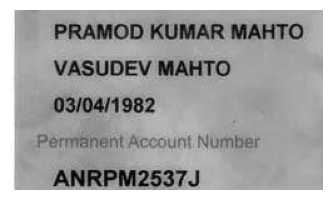

In [58]:
display("C:/Users/neeta/temp/CropPan1.jpg")

In [59]:
thresh, im_bwpan = cv2.threshold(croppedim, 70, 140, cv2.THRESH_BINARY)
cv2.imwrite("C:/Users/neeta/temp/bwpan.jpg", im_bwpan)

True

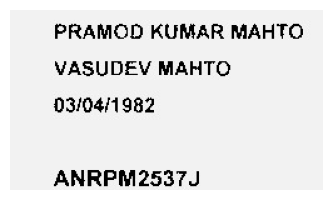

In [60]:
display("C:/Users/neeta/temp/bwpan.jpg")

In [61]:
img = Image.open(im_file)
ocr_result2 = pytesseract.image_to_string(croppedim)

In [62]:
print(ocr_result2)

PRAMOD KUMAR MAHTO.
VASUDEV MAHTO
03/04/1982

Permanent’Account Number

ANRPM2537J



In [63]:
pattern = re.compile('.*\s')
matches = pattern.finditer(ocr_result2)

In [64]:
panlist = []
for match in matches:
    for i in range(1):
        psublist = list(match.span())
        panlist.append(psublist)
print(panlist)

[[0, 20], [20, 34], [34, 45], [45, 46], [46, 71], [71, 72], [72, 83], [83, 84]]


In [69]:
def pop_useless_spans(slist):
    for n in range(len(slist)):
        p1 = slist[n][0]
        p2 = slist[n][1]
        dif = p2-p1
        if dif <= 4 or dif >= 25:
            slist.pop(n)

In [70]:
pop_useless_spans(panlist)
print(panlist)

[[0, 20], [20, 34], [34, 45], [72, 83]]


In [71]:
lf1 = panlist[0][0]
hf1 = panlist[0][1]
lf2 = panlist[1][0]
hf2 = panlist[1][1]
lf3 = panlist[2][0]
hf3 = panlist[2][1]
lf4 = panlist[3][0]
hf4 = panlist[3][1]

In [72]:
'''
f1 = ocr_result1[0:18]
f2 = ocr_result1[20:33]
f3 = ocr_result1[34:44]
f4 = ocr_result1[72:82]
'''
f1 = ocr_result1[lf1:hf1]
f2 = ocr_result1[lf2:hf2]
f3 = ocr_result1[lf3:hf3]
f4 = ocr_result1[lf4:hf4]

In [73]:
if __name__ == "__main__":
    client = pymongo.MongoClient("mongodb://localhost:27017")
    print(client)
    print(client.list_database_names())

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)
['OCR', 'admin', 'config', 'local', 'sample']


In [74]:
    db = client['OCR']  
    collection = db['PAN']

In [75]:
    dic1 = {'Name': f1, "Father's Name" : f2,'D.O.B.' : f3, 'PAN Number' : f4}
    collection.insert_one(dic1)

InsertOneResult(ObjectId('66477c094e33d50be2db5c8e'), acknowledged=True)

In [76]:
    print(dic1)

{'Name': 'D MANIKANDAN\nDURAISA', "Father's Name": 'MY\n\n16/07/1986', 'D.O.B.': '\nPormanent ', 'PAN Number': '\x0c', '_id': ObjectId('66477c094e33d50be2db5c8e')}
